In [1]:
#import libraries
import numpy as np
import pandas as pd
import datetime , timedelta

In [2]:
df=pd.read_csv('accdf.csv')

In [3]:
df

,From,To,DateTime,day_of_week,hour
0,1,102,2/20/2020 5:42,Thursday,5
1,1,102,2/20/2020 5:42,Thursday,5
2,1,112,4/1/2020 12:40,Wednesday,12
3,1,116,2/12/2020 8:30,Wednesday,8
4,1,116,2/12/2020 8:29,Wednesday,8
...,...,...,...,...,...
74765,295,91,4/3/2020 5:29,Friday,5
74766,295,93,3/12/2020 13:33,Thursday,13
74767,295,93,3/12/2020 14:38,Thursday,14
74768,295,93,2/24/2020 4:57,Monday,4


In [4]:
#Split on date
split_date ='3/14/2020'
df_pre = df.loc[df['DateTime'] <= split_date]
df_post = df.loc[df['DateTime'] > split_date]
df_pre

,From,To,DateTime,day_of_week,hour
0,1,102,2/20/2020 5:42,Thursday,5
1,1,102,2/20/2020 5:42,Thursday,5
3,1,116,2/12/2020 8:30,Wednesday,8
4,1,116,2/12/2020 8:29,Wednesday,8
5,1,116,2/13/2020 9:56,Thursday,9
...,...,...,...,...,...
74762,295,76,3/12/2020 4:55,Thursday,4
74766,295,93,3/12/2020 13:33,Thursday,13
74767,295,93,3/12/2020 14:38,Thursday,14
74768,295,93,2/24/2020 4:57,Monday,4


In [5]:
df_post

,From,To,DateTime,day_of_week,hour
2,1,112,4/1/2020 12:40,Wednesday,12
11,1,142,4/15/2020 13:12,Wednesday,13
12,1,142,4/15/2020 14:27,Wednesday,14
13,1,142,4/15/2020 12:56,Wednesday,12
14,1,142,4/13/2020 7:36,Monday,7
...,...,...,...,...,...
74759,295,76,3/24/2020 6:28,Tuesday,6
74760,295,76,3/22/2020 8:02,Sunday,8
74763,295,76,3/14/2020 8:40,Saturday,8
74764,295,91,4/6/2020 5:24,Monday,5


In [6]:
prestart=min(df_pre['DateTime'])
preend=max(df_pre['DateTime'])

In [7]:
prestart

'1/30/2020 0:59'

In [8]:
preend

'3/13/2020 9:58'

In [9]:
posstart=min(df_post['DateTime'])
poseend=max(df_post['DateTime'])

In [10]:
posstart

'3/14/2020 0:01'

In [11]:
poseend

'4/9/2020 9:59'

In [16]:
PreCC=df_pre.groupby ('From')['To'].count().sort_values(ascending=False)

In [17]:
PreCC.to_csv(r'PreCC.csv')

In [18]:
PreCC

From
122    926
168    686
84     613
91     543
54     492
      ... 
180      4
257      2
244      1
246      1
247      1
Name: To, Length: 289, dtype: int64

In [14]:
PostCC=df_post.groupby ('From')['To'].count().sort_values(ascending=False)

In [15]:
PostCC.to_csv(r'PostCC.csv')

In [20]:
PostCC

From
122    1396
54      708
168     568
91      549
64      548
       ... 
258       4
256       3
246       1
90        1
130       1
Name: To, Length: 289, dtype: int64

In [21]:
PrePo=pd.merge(PreCC, PostCC, on='From')
PrePo

,To_x,To_y
From,,
122,926,1396
168,686,568
84,613,400
91,543,549
54,492,708
...,...,...
258,6,4
248,5,5
180,4,100


In [22]:
## Remove duplicate datetime  from address to eliminate cc's
dfpr = df_pre.reset_index().drop_duplicates(subset=['From','DateTime'],keep='first').set_index('index')
dfpo = df_post.reset_index().drop_duplicates(subset=['From','DateTime'],keep='first').set_index('index')

In [23]:
PreNCC=dfpr.groupby ('From')['To'].count().sort_values(ascending=False)

In [24]:
PreNCC

From
122    768
168    559
84     545
91     513
54     467
      ... 
117      4
257      2
246      1
247      1
244      1
Name: To, Length: 289, dtype: int64

In [25]:
PostNCC=dfpo.groupby ('From')['To'].count().sort_values(ascending=False)
PostNCC

From
122    1227
54      695
168     548
64      532
91      527
       ... 
258       4
256       3
90        1
246       1
130       1
Name: To, Length: 289, dtype: int64

In [26]:
PrePot=pd.merge(PrePo, PreNCC, on='From')
PrePot

,To_x,To_y,To
From,,,
122,926,1396,768
168,686,568,559
84,613,400,545
91,543,549,513
54,492,708,467
...,...,...,...
258,6,4,6
248,5,5,5
180,4,100,4


In [27]:
PrePot2=pd.merge(PrePot, PostNCC, on='From')
PrePot2

,To_x,To_y,To_x,To_y
From,,,,
122,926,1396,768,1227
168,686,568,559,548
84,613,400,545,320
91,543,549,513,527
54,492,708,467,695
...,...,...,...,...
258,6,4,6,4
248,5,5,5,5
180,4,100,4,98


In [29]:
PrePot2.to_csv(r'accraw.csv')

In [30]:
# create a joined file with the HR doc

In [31]:
hr=pd.read_csv('accentureona.csv')

In [33]:
df2=pd.read_csv('accraw.csv')

In [38]:
hr

,address,department,level,location,gender,tenure,Influencers,hipo,offset
0,addr4@anondomain.non,TL,3,B,female,7,N,no,5
1,addr10@anondomain.non,TL,4,G,male,2,N,no,5
2,addr3@anondomain.non,TL,1,G,male,7,N,yes,5
3,addr5@anondomain.non,OC,4,B,female,2,N,no,5
4,addr9@anondomain.non,TL,3,G,male,1,N,no,5
...,...,...,...,...,...,...,...,...,...
276,addr291@anondomain.non,TL,3,P,male,1,N,no,5
277,addr292@anondomain.non,OC,4,B,male,1,Y,no,5
278,addr293@anondomain.non,OC,3,B,female,4,N,no,5
279,addr294@anondomain.non,TL,4,G,female,2,N,no,5


In [39]:
hr['address']=hr['address'].str.extract('(\d+)').astype(int)

In [40]:
jdf=pd.merge(hr, df2, on='address')

In [41]:
jdf

,address,department,level,location,gender,tenure,Influencers,hipo,offset,Pre,Post,Pre-N-CC,Post-N-CC
0,4,TL,3,B,female,7,N,no,5,42,149,41,146
1,10,TL,4,G,male,2,N,no,5,81,104,80,104
2,3,TL,1,G,male,7,N,yes,5,181,238,174,229
3,5,OC,4,B,female,2,N,no,5,79,141,75,134
4,9,TL,3,G,male,1,N,no,5,39,238,38,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,291,TL,3,P,male,1,N,no,5,11,7,11,7
271,292,OC,4,B,male,1,Y,no,5,17,87,17,82
272,293,OC,3,B,female,4,N,no,5,98,82,86,76
273,294,TL,4,G,female,2,N,no,5,85,48,82,48


In [43]:
jdf.to_csv(r'joinedNodeAndNcc.csv', index = False)

In [44]:
df

,From,To,DateTime,day_of_week,hour
0,1,102,2/20/2020 5:42,Thursday,5
1,1,102,2/20/2020 5:42,Thursday,5
2,1,112,4/1/2020 12:40,Wednesday,12
3,1,116,2/12/2020 8:30,Wednesday,8
4,1,116,2/12/2020 8:29,Wednesday,8
...,...,...,...,...,...
74765,295,91,4/3/2020 5:29,Friday,5
74766,295,93,3/12/2020 13:33,Thursday,13
74767,295,93,3/12/2020 14:38,Thursday,14
74768,295,93,2/24/2020 4:57,Monday,4


In [46]:
df.groupby ('From')['DateTime'].count()

From
1      139
2      171
3      419
4      191
5      220
      ... 
291     18
292    104
293    180
294    133
295    322
Name: DateTime, Length: 291, dtype: int64

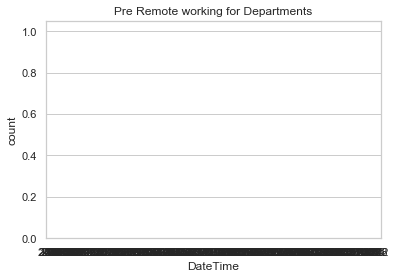

In [48]:
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style("whitegrid")
order = df['From'].value_counts(ascending=True).index
sns.countplot(x='DateTime', data=dfpr, order=order).set(title = 'Pre Remote working for Departments');

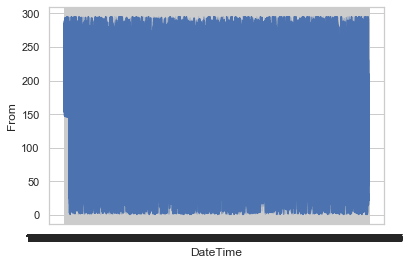

In [51]:

ax = sns.lineplot(x="DateTime", y="From", data=df)
